In [1]:
# Dependencies and Setup
# Not sure if I really neeed the time module since I'm just using datetime 
# to print the date on my charts...
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime 
import time
import json

# Import to use later for bold formatting
from IPython.display import Markdown, display

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Format date for latter use
date_capture = datetime.datetime.now()
current_date = date_capture.strftime("%m/%d/%Y")

# Declare output File (CSV), for later use
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

607


In [3]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Set counters for use later
set_count = 1
counter = 1


#Print header for Data Retrieval
print("-----------------------------\n")
print( "Beginning Data Retrieval\n")  
print("-----------------------------\n")

# Set up empty list to be loaded
city_name_list = []
city_id_list = []
city_cloudiness_list = []
city_country_list = []
city_date_list = []
city_humidity_list = []
city_lat_list = []
city_lng_list = []
city_max_temp_list = []
city_wind_speed_list = []


# For loop to go through our cities list and find the weather info for the city
for city in cities:
        
        # Try/ Except block for error handling
        try:
            
            # Get weather data and turn into JSON format
            query_url = f"{base_url}appid={api_key}&q={city}&units=imperial"
            city_weather = requests.get(query_url).json()
            
            # This was a pretty print I used to get the right indexes for the assignments below
            #print(json.dumps(city_weather, indent=4, sort_keys=True))
            
            
            # Get required the weather info for the current city
            city_name = city_weather["name"]
            city_id = city_weather["id"]
            city_cloudiness = city_weather["clouds"]["all"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]
            city_humidity = city_weather["main"]["humidity"]
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_wind_speed = city_weather["wind"]["speed"]
            
            
            # Load the information into lists so we can make a DF later
            city_name_list.append(city_name)
            city_id_list.append(city_id)
            city_cloudiness_list.append(city_cloudiness)
            city_country_list.append(city_country)
            city_date_list.append(city_date)
            city_humidity_list.append(city_humidity)
            city_lat_list.append(city_lat)
            city_lng_list.append(city_lng)
            city_max_temp_list.append(city_max_temp)
            city_wind_speed_list.append(city_wind_speed)
           
            
            # Print the city and set if the city is found
            print(f"Processing Record {counter}  of Set {set_count} | {city_name}")
            
            # Line I was using for error checking
            #print(city_name, city_id, city_cloudiness, city_country, city_date, city_humidity, city_lat, city_lng, city_max_temp, city_wind_speed)
            
            
            # Keep count of cities in set
            counter += 1
            
            
            # Limiter I was using during tesing
            #if set_count == 3:
                #break
                
            # Increase the set_count by 1 every time we retrive a group of 50 cities and reset counter   
            if counter % 51 == 0:
                set_count += 1
                counter = 1
                
        # Except block handle KeyErrors        
        except KeyError:
            
            # Format the exception output so it prnts in bold and is easier to see_
            # when we coudn't find a city
            bold = lambda word : display(Markdown(word))
            bold("**City not found.  Skipping...**")


            
# Footer for retrieval log
print("\n-----------------------------\n")             
print( "Data Retrieval Complete\n")  
print("-----------------------------\n")            



# Notes I kept for different ways to approch this.  Obvioulsy I chose to just use appended lists...     
# Put each city into a dict
# Build seperate lists for each weather feature as we itterate through the for loop

-----------------------------

Beginning Data Retrieval

-----------------------------

Processing Record 1  of Set 1 | Bredasdorp
Processing Record 2  of Set 1 | Rikitea
Processing Record 3  of Set 1 | Mataura
Processing Record 4  of Set 1 | Pevek
Processing Record 5  of Set 1 | Prieska
Processing Record 6  of Set 1 | Garmsar
Processing Record 7  of Set 1 | Kapaa
Processing Record 8  of Set 1 | Mahebourg
Processing Record 9  of Set 1 | Tapes
Processing Record 10  of Set 1 | Tuatapere
Processing Record 11  of Set 1 | Baran
Processing Record 12  of Set 1 | Bluff
Processing Record 13  of Set 1 | Kutulik
Processing Record 14  of Set 1 | Jamestown
Processing Record 15  of Set 1 | Ponta do Sol
Processing Record 16  of Set 1 | Aklavik
Processing Record 17  of Set 1 | Zaysan


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 18  of Set 1 | Cape Town


**City not found.  Skipping...**

Processing Record 19  of Set 1 | Thompson


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 20  of Set 1 | High Level
Processing Record 21  of Set 1 | Busselton
Processing Record 22  of Set 1 | Petropavlovsk-Kamchatskiy
Processing Record 23  of Set 1 | Ushuaia


**City not found.  Skipping...**

Processing Record 24  of Set 1 | Airai
Processing Record 25  of Set 1 | Araouane
Processing Record 26  of Set 1 | Tiksi
Processing Record 27  of Set 1 | Saint George
Processing Record 28  of Set 1 | Bay Roberts
Processing Record 29  of Set 1 | Finschhafen
Processing Record 30  of Set 1 | Albany
Processing Record 31  of Set 1 | Saint-Philippe
Processing Record 32  of Set 1 | Mentougou
Processing Record 33  of Set 1 | Rio Grande
Processing Record 34  of Set 1 | Homer
Processing Record 35  of Set 1 | Te Anau
Processing Record 36  of Set 1 | Hithadhoo
Processing Record 37  of Set 1 | Urmary
Processing Record 38  of Set 1 | Moose Factory
Processing Record 39  of Set 1 | Prainha
Processing Record 40  of Set 1 | Itapirapua
Processing Record 41  of Set 1 | Najran
Processing Record 42  of Set 1 | Bemidji
Processing Record 43  of Set 1 | Severo-Kurilsk
Processing Record 44  of Set 1 | Funadhoo
Processing Record 45  of Set 1 | Tilichiki


**City not found.  Skipping...**

Processing Record 46  of Set 1 | Hermanus


**City not found.  Skipping...**

Processing Record 47  of Set 1 | Kavieng
Processing Record 48  of Set 1 | Geraldton
Processing Record 49  of Set 1 | Galle
Processing Record 50  of Set 1 | Kodiak
Processing Record 1  of Set 2 | Labuhan
Processing Record 2  of Set 2 | Atuona
Processing Record 3  of Set 2 | Chitungwiza
Processing Record 4  of Set 2 | Cabo San Lucas


**City not found.  Skipping...**

Processing Record 5  of Set 2 | Fortuna
Processing Record 6  of Set 2 | Nikolskoye
Processing Record 7  of Set 2 | Kununurra
Processing Record 8  of Set 2 | Kinsale
Processing Record 9  of Set 2 | Kruisfontein


**City not found.  Skipping...**

Processing Record 10  of Set 2 | Atambua
Processing Record 11  of Set 2 | Dikson
Processing Record 12  of Set 2 | Butaritari
Processing Record 13  of Set 2 | Mar del Plata
Processing Record 14  of Set 2 | Bilibino
Processing Record 15  of Set 2 | Haimen
Processing Record 16  of Set 2 | Celestun


**City not found.  Skipping...**

Processing Record 17  of Set 2 | Mango
Processing Record 18  of Set 2 | Zhadovka
Processing Record 19  of Set 2 | Mount Gambier
Processing Record 20  of Set 2 | Punta Arenas
Processing Record 21  of Set 2 | Tuktoyaktuk
Processing Record 22  of Set 2 | Yellowknife
Processing Record 23  of Set 2 | Puerto Ayora
Processing Record 24  of Set 2 | Sisimiut
Processing Record 25  of Set 2 | Rudnichnyy
Processing Record 26  of Set 2 | Kumluca
Processing Record 27  of Set 2 | Saint-Augustin
Processing Record 28  of Set 2 | Narsaq
Processing Record 29  of Set 2 | Pitimbu
Processing Record 30  of Set 2 | Luebo
Processing Record 31  of Set 2 | Barcelona
Processing Record 32  of Set 2 | Amarillo
Processing Record 33  of Set 2 | Tecoanapa
Processing Record 34  of Set 2 | Qaanaaq
Processing Record 35  of Set 2 | Deputatskiy
Processing Record 36  of Set 2 | Avarua
Processing Record 37  of Set 2 | Esperance
Processing Record 38  of Set 2 | Port Alfred
Processing Record 39  of Set 2 | Palmer
Processing Re

**City not found.  Skipping...**

Processing Record 15  of Set 3 | Port Hardy
Processing Record 16  of Set 3 | Brokopondo
Processing Record 17  of Set 3 | Fairbanks
Processing Record 18  of Set 3 | Turukhansk
Processing Record 19  of Set 3 | Coronel Fabriciano
Processing Record 20  of Set 3 | Beira
Processing Record 21  of Set 3 | Samarai
Processing Record 22  of Set 3 | Carndonagh
Processing Record 23  of Set 3 | Nishihara
Processing Record 24  of Set 3 | Hambantota
Processing Record 25  of Set 3 | Loiza
Processing Record 26  of Set 3 | Ulaangom
Processing Record 27  of Set 3 | Bull Savanna
Processing Record 28  of Set 3 | New Norfolk


**City not found.  Skipping...**

Processing Record 29  of Set 3 | Tadine
Processing Record 30  of Set 3 | Klaksvik
Processing Record 31  of Set 3 | Ust-Kuyga
Processing Record 32  of Set 3 | Iqaluit


**City not found.  Skipping...**

Processing Record 33  of Set 3 | Arraial do Cabo
Processing Record 34  of Set 3 | Ugoofaaru
Processing Record 35  of Set 3 | Luderitz
Processing Record 36  of Set 3 | Cooma
Processing Record 37  of Set 3 | Kurilsk
Processing Record 38  of Set 3 | Lloydminster
Processing Record 39  of Set 3 | Santiago
Processing Record 40  of Set 3 | Gunjur
Processing Record 41  of Set 3 | Tandil
Processing Record 42  of Set 3 | Avera
Processing Record 43  of Set 3 | Talaya


**City not found.  Skipping...**

Processing Record 44  of Set 3 | Asyut
Processing Record 45  of Set 3 | Youkounkoun
Processing Record 46  of Set 3 | Santa Rosa
Processing Record 47  of Set 3 | Tateyama
Processing Record 48  of Set 3 | Georgetown
Processing Record 49  of Set 3 | Clyde River
Processing Record 50  of Set 3 | Ribeira Grande
Processing Record 1  of Set 4 | Provideniya
Processing Record 2  of Set 4 | Ratnagiri
Processing Record 3  of Set 4 | Porto Novo
Processing Record 4  of Set 4 | Oksfjord


**City not found.  Skipping...**

Processing Record 5  of Set 4 | Constitucion


**City not found.  Skipping...**

Processing Record 6  of Set 4 | Viedma
Processing Record 7  of Set 4 | Bafq
Processing Record 8  of Set 4 | Taoudenni
Processing Record 9  of Set 4 | Leningradskiy
Processing Record 10  of Set 4 | Bata
Processing Record 11  of Set 4 | Haines Junction
Processing Record 12  of Set 4 | Rehti
Processing Record 13  of Set 4 | Villa Carlos Paz
Processing Record 14  of Set 4 | Beyneu
Processing Record 15  of Set 4 | Lamont
Processing Record 16  of Set 4 | Puerto Colombia
Processing Record 17  of Set 4 | Yanliang
Processing Record 18  of Set 4 | Dipalpur
Processing Record 19  of Set 4 | Arawa
Processing Record 20  of Set 4 | La Ronge
Processing Record 21  of Set 4 | Kalmunai
Processing Record 22  of Set 4 | Victoria
Processing Record 23  of Set 4 | Kidal
Processing Record 24  of Set 4 | Sovetskiy
Processing Record 25  of Set 4 | Torbay
Processing Record 26  of Set 4 | Lincoln


**City not found.  Skipping...**

Processing Record 27  of Set 4 | Hilo
Processing Record 28  of Set 4 | Gambela


**City not found.  Skipping...**

Processing Record 29  of Set 4 | Pascagoula
Processing Record 30  of Set 4 | Atar
Processing Record 31  of Set 4 | San Juan de la Maguana
Processing Record 32  of Set 4 | Guerrero Negro
Processing Record 33  of Set 4 | East London


**City not found.  Skipping...**

Processing Record 34  of Set 4 | Saldanha
Processing Record 35  of Set 4 | Altay
Processing Record 36  of Set 4 | Fengcheng
Processing Record 37  of Set 4 | Calarasi
Processing Record 38  of Set 4 | Kaitangata
Processing Record 39  of Set 4 | Taraz


**City not found.  Skipping...**

Processing Record 40  of Set 4 | Mumford
Processing Record 41  of Set 4 | Severnoye
Processing Record 42  of Set 4 | Faanui
Processing Record 43  of Set 4 | Salme
Processing Record 44  of Set 4 | Florencia
Processing Record 45  of Set 4 | Goianesia
Processing Record 46  of Set 4 | Lorengau
Processing Record 47  of Set 4 | Hamilton
Processing Record 48  of Set 4 | Kenai
Processing Record 49  of Set 4 | Saint-Joseph
Processing Record 50  of Set 4 | Khandyga
Processing Record 1  of Set 5 | Aragarcas
Processing Record 2  of Set 5 | Evensk
Processing Record 3  of Set 5 | Tasiilaq
Processing Record 4  of Set 5 | Bambous Virieux
Processing Record 5  of Set 5 | Solnechnyy


**City not found.  Skipping...**

Processing Record 6  of Set 5 | Vestmannaeyjar
Processing Record 7  of Set 5 | Golden
Processing Record 8  of Set 5 | Bathsheba


**City not found.  Skipping...**

Processing Record 9  of Set 5 | Sao Sebastiao
Processing Record 10  of Set 5 | Winona
Processing Record 11  of Set 5 | Lagoa
Processing Record 12  of Set 5 | Staryy Nadym
Processing Record 13  of Set 5 | Port Lincoln
Processing Record 14  of Set 5 | Merauke
Processing Record 15  of Set 5 | Belyy Yar
Processing Record 16  of Set 5 | San Antonio
Processing Record 17  of Set 5 | Ambilobe
Processing Record 18  of Set 5 | Zarubino
Processing Record 19  of Set 5 | Taber
Processing Record 20  of Set 5 | Hovd
Processing Record 21  of Set 5 | Mbekenyera
Processing Record 22  of Set 5 | Ahipara
Processing Record 23  of Set 5 | Itarema
Processing Record 24  of Set 5 | Ballina
Processing Record 25  of Set 5 | Strezhevoy
Processing Record 26  of Set 5 | Ostrovnoy
Processing Record 27  of Set 5 | Chateauroux
Processing Record 28  of Set 5 | Vardo


**City not found.  Skipping...**

Processing Record 29  of Set 5 | Rodrigues Alves
Processing Record 30  of Set 5 | Port Blair
Processing Record 31  of Set 5 | Swansea
Processing Record 32  of Set 5 | Faya
Processing Record 33  of Set 5 | Kupang


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 34  of Set 5 | Gamboma
Processing Record 35  of Set 5 | Hobyo
Processing Record 36  of Set 5 | Mehran
Processing Record 37  of Set 5 | Saskylakh
Processing Record 38  of Set 5 | Nevelsk
Processing Record 39  of Set 5 | Port-Cartier
Processing Record 40  of Set 5 | Wamba
Processing Record 41  of Set 5 | Mvomero
Processing Record 42  of Set 5 | Launceston
Processing Record 43  of Set 5 | Yulara
Processing Record 44  of Set 5 | Honiara
Processing Record 45  of Set 5 | Nizhnyaya Tura
Processing Record 46  of Set 5 | Kibre Mengist
Processing Record 47  of Set 5 | Hasaki
Processing Record 48  of Set 5 | Barma
Processing Record 49  of Set 5 | Ashbourne
Processing Record 50  of Set 5 | North Bend
Processing Record 1  of Set 6 | Vila Franca do Campo
Processing Record 2  of Set 6 | Neepawa
Processing Record 3  of Set 6 | Puerto Escondido
Processing Record 4  of Set 6 | Tupik
Processing Record 5  of Set 6 | Lata
Processing Record 6  of Set 6 | Kahului
Processing Record 7  of Set

**City not found.  Skipping...**

Processing Record 10  of Set 6 | Port-de-Bouc


**City not found.  Skipping...**

Processing Record 11  of Set 6 | Bowen
Processing Record 12  of Set 6 | Hofn
Processing Record 13  of Set 6 | Namatanai
Processing Record 14  of Set 6 | Vila Velha
Processing Record 15  of Set 6 | Trinidad


**City not found.  Skipping...**

Processing Record 16  of Set 6 | Chapais
Processing Record 17  of Set 6 | Orje
Processing Record 18  of Set 6 | Vostok
Processing Record 19  of Set 6 | Saint-Pierre
Processing Record 20  of Set 6 | Novaya Ladoga
Processing Record 21  of Set 6 | Gualeguaychu
Processing Record 22  of Set 6 | Tucurui
Processing Record 23  of Set 6 | Tessalit
Processing Record 24  of Set 6 | Nema


**City not found.  Skipping...**

Processing Record 25  of Set 6 | Cherskiy
Processing Record 26  of Set 6 | Krasnaya Gora
Processing Record 27  of Set 6 | Sao Filipe
Processing Record 28  of Set 6 | Cabra
Processing Record 29  of Set 6 | Kolondieba
Processing Record 30  of Set 6 | Makakilo City
Processing Record 31  of Set 6 | Metro
Processing Record 32  of Set 6 | Nome
Processing Record 33  of Set 6 | Cabedelo
Processing Record 34  of Set 6 | Canutama
Processing Record 35  of Set 6 | Namibe
Processing Record 36  of Set 6 | Rome
Processing Record 37  of Set 6 | Batsfjord
Processing Record 38  of Set 6 | College
Processing Record 39  of Set 6 | Chara
Processing Record 40  of Set 6 | Erenhot
Processing Record 41  of Set 6 | Stonewall
Processing Record 42  of Set 6 | Carnarvon
Processing Record 43  of Set 6 | Boyolangu
Processing Record 44  of Set 6 | Chifeng
Processing Record 45  of Set 6 | Escanaba


**City not found.  Skipping...**

Processing Record 46  of Set 6 | Awjilah
Processing Record 47  of Set 6 | Necochea
Processing Record 48  of Set 6 | Luanda
Processing Record 49  of Set 6 | Chuy
Processing Record 50  of Set 6 | Kingsport
Processing Record 1  of Set 7 | Minervino Murge
Processing Record 2  of Set 7 | Kosh-Agach
Processing Record 3  of Set 7 | Maua
Processing Record 4  of Set 7 | Altayskoye


**City not found.  Skipping...**

Processing Record 5  of Set 7 | Buala
Processing Record 6  of Set 7 | Baykit
Processing Record 7  of Set 7 | Coquimbo
Processing Record 8  of Set 7 | Mount Isa


**City not found.  Skipping...**

Processing Record 9  of Set 7 | Altagracia de Orituco
Processing Record 10  of Set 7 | Samana
Processing Record 11  of Set 7 | Cayenne
Processing Record 12  of Set 7 | Norman Wells
Processing Record 13  of Set 7 | Verkhnyaya Inta
Processing Record 14  of Set 7 | Tocopilla
Processing Record 15  of Set 7 | Hay River
Processing Record 16  of Set 7 | Sukhaya Buyvola
Processing Record 17  of Set 7 | San Jose
Processing Record 18  of Set 7 | Szegvar
Processing Record 19  of Set 7 | Yining
Processing Record 20  of Set 7 | Kang
Processing Record 21  of Set 7 | Laguna
Processing Record 22  of Set 7 | Condado
Processing Record 23  of Set 7 | Nicoya
Processing Record 24  of Set 7 | Pangnirtung
Processing Record 25  of Set 7 | Kalabo
Processing Record 26  of Set 7 | San Policarpo
Processing Record 27  of Set 7 | Salinopolis
Processing Record 28  of Set 7 | Bukama
Processing Record 29  of Set 7 | Tolstoy-Yurt
Processing Record 30  of Set 7 | Nadym
Processing Record 31  of Set 7 | Mayumba
Processing

**City not found.  Skipping...**

Processing Record 42  of Set 7 | Lebu
Processing Record 43  of Set 7 | Pittsburg
Processing Record 44  of Set 7 | Stokmarknes
Processing Record 45  of Set 7 | Upernavik
Processing Record 46  of Set 7 | Linjiang
Processing Record 47  of Set 7 | Bahia Honda
Processing Record 48  of Set 7 | Castro
Processing Record 49  of Set 7 | Wajima
Processing Record 50  of Set 7 | Vanimo
Processing Record 1  of Set 8 | Surt
Processing Record 2  of Set 8 | Talnakh
Processing Record 3  of Set 8 | Cidreira
Processing Record 4  of Set 8 | Zhigansk
Processing Record 5  of Set 8 | Lazaro Cardenas
Processing Record 6  of Set 8 | Sekoma
Processing Record 7  of Set 8 | Grand Gaube
Processing Record 8  of Set 8 | Ifanadiana
Processing Record 9  of Set 8 | Katsuura
Processing Record 10  of Set 8 | Ixtapa
Processing Record 11  of Set 8 | Nanortalik
Processing Record 12  of Set 8 | Wukari
Processing Record 13  of Set 8 | Kamenka
Processing Record 14  of Set 8 | Marfino
Processing Record 15  of Set 8 | Jizan
Proce

**City not found.  Skipping...**

Processing Record 23  of Set 8 | Betulia
Processing Record 24  of Set 8 | Port Macquarie
Processing Record 25  of Set 8 | Bonavista
Processing Record 26  of Set 8 | Broken Hill
Processing Record 27  of Set 8 | Santa Maria


**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 28  of Set 8 | Longyearbyen
Processing Record 29  of Set 8 | Fasa
Processing Record 30  of Set 8 | Lashio
Processing Record 31  of Set 8 | Lakes Entrance
Processing Record 32  of Set 8 | Karratha
Processing Record 33  of Set 8 | Ancud
Processing Record 34  of Set 8 | Isangel
Processing Record 35  of Set 8 | Chiang Klang
Processing Record 36  of Set 8 | Zabaykalsk
Processing Record 37  of Set 8 | Sinnamary
Processing Record 38  of Set 8 | Puerto Cabezas
Processing Record 39  of Set 8 | Naples
Processing Record 40  of Set 8 | Mathathane
Processing Record 41  of Set 8 | Paita
Processing Record 42  of Set 8 | Yeysk
Processing Record 43  of Set 8 | Tongchuan
Processing Record 44  of Set 8 | Wheeling
Processing Record 45  of Set 8 | Parkes
Processing Record 46  of Set 8 | Gayny


**City not found.  Skipping...**

Processing Record 47  of Set 8 | Gao
Processing Record 48  of Set 8 | Bethel
Processing Record 49  of Set 8 | Gat
Processing Record 50  of Set 8 | Jenison
Processing Record 1  of Set 9 | Humaita
Processing Record 2  of Set 9 | Sobolevo
Processing Record 3  of Set 9 | Souillac
Processing Record 4  of Set 9 | Okhotsk
Processing Record 5  of Set 9 | Joshimath
Processing Record 6  of Set 9 | Guamuchil
Processing Record 7  of Set 9 | Bambanglipuro
Processing Record 8  of Set 9 | Sioni


**City not found.  Skipping...**

Processing Record 9  of Set 9 | Natchitoches
Processing Record 10  of Set 9 | Chambas
Processing Record 11  of Set 9 | Aswan
Processing Record 12  of Set 9 | Aykhal
Processing Record 13  of Set 9 | Bereda


**City not found.  Skipping...**

Processing Record 14  of Set 9 | Alexandria
Processing Record 15  of Set 9 | Pedasi
Processing Record 16  of Set 9 | Dingle
Processing Record 17  of Set 9 | Shakiso
Processing Record 18  of Set 9 | Auki
Processing Record 19  of Set 9 | Dicabisagan
Processing Record 20  of Set 9 | Nuuk
Processing Record 21  of Set 9 | Haikou
Processing Record 22  of Set 9 | Noumea
Processing Record 23  of Set 9 | Ankang


**City not found.  Skipping...**

Processing Record 24  of Set 9 | Las Tunas
Processing Record 25  of Set 9 | Bubaque
Processing Record 26  of Set 9 | Fukuma
Processing Record 27  of Set 9 | Swellendam
Processing Record 28  of Set 9 | Sosua
Processing Record 29  of Set 9 | Guacui
Processing Record 30  of Set 9 | Burglengenfeld
Processing Record 31  of Set 9 | Tankhoy
Processing Record 32  of Set 9 | Port Hedland
Processing Record 33  of Set 9 | Mackay
Processing Record 34  of Set 9 | Jalapa
Processing Record 35  of Set 9 | Luganville
Processing Record 36  of Set 9 | San Patricio
Processing Record 37  of Set 9 | Cockburn Town
Processing Record 38  of Set 9 | Hecun


**City not found.  Skipping...**

Processing Record 39  of Set 9 | Inhambane
Processing Record 40  of Set 9 | Sechura
Processing Record 41  of Set 9 | Havoysund
Processing Record 42  of Set 9 | Hami
Processing Record 43  of Set 9 | Vallenar
Processing Record 44  of Set 9 | Halifax
Processing Record 45  of Set 9 | Camopi
Processing Record 46  of Set 9 | Ak-Dovurak
Processing Record 47  of Set 9 | Coihaique
Processing Record 48  of Set 9 | Alpharetta
Processing Record 49  of Set 9 | Miyako
Processing Record 50  of Set 9 | Marawi
Processing Record 1  of Set 10 | Sitka
Processing Record 2  of Set 10 | Thap Than
Processing Record 3  of Set 10 | Rio Branco
Processing Record 4  of Set 10 | Sao Joao da Barra
Processing Record 5  of Set 10 | Hanstholm
Processing Record 6  of Set 10 | Srednekolymsk
Processing Record 7  of Set 10 | Maniitsoq


**City not found.  Skipping...**

Processing Record 8  of Set 10 | Mizan Teferi
Processing Record 9  of Set 10 | Nampula
Processing Record 10  of Set 10 | Natal
Processing Record 11  of Set 10 | Honningsvag
Processing Record 12  of Set 10 | Tongling
Processing Record 13  of Set 10 | Kyrylivka
Processing Record 14  of Set 10 | Dullewala
Processing Record 15  of Set 10 | Anloga
Processing Record 16  of Set 10 | Champerico
Processing Record 17  of Set 10 | Obo
Processing Record 18  of Set 10 | Bako
Processing Record 19  of Set 10 | Mudanya
Processing Record 20  of Set 10 | Zhanaozen
Processing Record 21  of Set 10 | Mulege
Processing Record 22  of Set 10 | Horki
Processing Record 23  of Set 10 | De-Kastri
Processing Record 24  of Set 10 | Teacapan
Processing Record 25  of Set 10 | Broome
Processing Record 26  of Set 10 | Port-Gentil
Processing Record 27  of Set 10 | San Cristobal
Processing Record 28  of Set 10 | Aparecida
Processing Record 29  of Set 10 | Kamina
Processing Record 30  of Set 10 | Traverse City
Processing 

**City not found.  Skipping...**

Processing Record 36  of Set 10 | Namangan
Processing Record 37  of Set 10 | Qaqortoq
Processing Record 38  of Set 10 | Svetlaya
Processing Record 39  of Set 10 | Brae
Processing Record 40  of Set 10 | Provost
Processing Record 41  of Set 10 | Russkaya Polyana
Processing Record 42  of Set 10 | Balabac
Processing Record 43  of Set 10 | Yerbogachen
Processing Record 44  of Set 10 | Asbestos
Processing Record 45  of Set 10 | Pingliang
Processing Record 46  of Set 10 | Okha
Processing Record 47  of Set 10 | Havre-Saint-Pierre
Processing Record 48  of Set 10 | Gimli
Processing Record 49  of Set 10 | Bagdarin
Processing Record 50  of Set 10 | Van
Processing Record 1  of Set 11 | Salalah
Processing Record 2  of Set 11 | Taywarah
Processing Record 3  of Set 11 | Matehuala
Processing Record 4  of Set 11 | Marshall
Processing Record 5  of Set 11 | Mercedes
Processing Record 6  of Set 11 | Caraquet
Processing Record 7  of Set 11 | Zhezkazgan
Processing Record 8  of Set 11 | Songjianghe
Processing

**City not found.  Skipping...**

**City not found.  Skipping...**

Processing Record 24  of Set 11 | Byron Bay
Processing Record 25  of Set 11 | Isaka
Processing Record 26  of Set 11 | Quelimane


**City not found.  Skipping...**

Processing Record 27  of Set 11 | La Rioja


**City not found.  Skipping...**

Processing Record 28  of Set 11 | Iracoubo


**City not found.  Skipping...**

Processing Record 29  of Set 11 | Codrington
Processing Record 30  of Set 11 | Kyshtovka
Processing Record 31  of Set 11 | Aginskoye
Processing Record 32  of Set 11 | Saint-Georges
Processing Record 33  of Set 11 | Pacific Grove
Processing Record 34  of Set 11 | Kolkwitz
Processing Record 35  of Set 11 | Jeremie
Processing Record 36  of Set 11 | Ambatondrazaka
Processing Record 37  of Set 11 | Axim
Processing Record 38  of Set 11 | Naze
Processing Record 39  of Set 11 | Berdigestyakh
Processing Record 40  of Set 11 | Sur
Processing Record 41  of Set 11 | Nador
Processing Record 42  of Set 11 | Valparaiso
Processing Record 43  of Set 11 | San Carlos de Bariloche


**City not found.  Skipping...**

Processing Record 44  of Set 11 | Poum
Processing Record 45  of Set 11 | Siverek


**City not found.  Skipping...**

Processing Record 46  of Set 11 | Siavonga
Processing Record 47  of Set 11 | Eureka
Processing Record 48  of Set 11 | Wigtown
Processing Record 49  of Set 11 | Deep River
Processing Record 50  of Set 11 | Talcahuano
Processing Record 1  of Set 12 | Sistranda
Processing Record 2  of Set 12 | Flin Flon
Processing Record 3  of Set 12 | Santa Cruz
Processing Record 4  of Set 12 | Grindavik
Processing Record 5  of Set 12 | Channel-Port aux Basques
Processing Record 6  of Set 12 | Montrose

-----------------------------

Data Retrieval Complete

-----------------------------



In [4]:
# Build my City Weather DF from the loaded lists
city_weather_df = pd.DataFrame({"City Name" : city_name_list,
                                "City ID" : city_id_list,
                                "Cloudiness" : city_cloudiness_list,
                                "Country" : city_country_list,
                                "Date" : city_date_list,
                                "Humidity" : city_humidity_list,
                                "Latitude" : city_lat_list,
                                "Longitude" : city_lng_list,
                                "Max Temperature (F)" : city_max_temp_list,
                                "Wind Speed" : city_wind_speed_list
                                })


# Check the final city count
city_weather_df.count()

City Name              556
City ID                556
Cloudiness             556
Country                556
Date                   556
Humidity               556
Latitude               556
Longitude              556
Max Temperature (F)    556
Wind Speed             556
dtype: int64

In [5]:
# Save the City Weather DF to a CSV file
export_csv = city_weather_df.to_csv(output_data_file, index = None, header=True)

# Print a preview of City Weather DF
city_weather_df.head()

,City Name,City ID,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature (F),Wind Speed
0,Bredasdorp,1015776,96,ZA,1559174341,93,-34.53,20.04,57.99,4.07
1,Rikitea,4030556,78,PF,1559174342,81,-23.12,-134.97,77.39,19.10
2,Mataura,6201424,100,NZ,1559174342,94,-46.19,168.86,46.99,6.67
3,Pevek,2122090,1,RU,1559174342,85,69.70,170.27,31.18,6.85
4,Prieska,964090,16,ZA,1559174342,30,-29.67,22.74,60.23,8.30


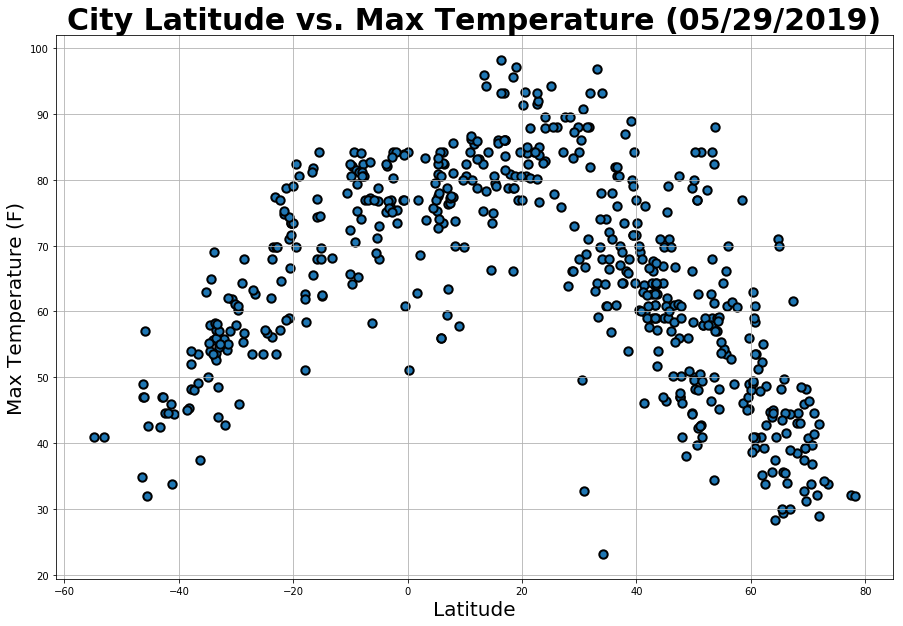

In [6]:
# Create the Latitude vs. Temperature Plot
lat_v_temp_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Max Temperature (F)", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )


# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 20)
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Temperature Plot to a png file
plt.savefig("output_data/City_Lat_vs_Temp.png")

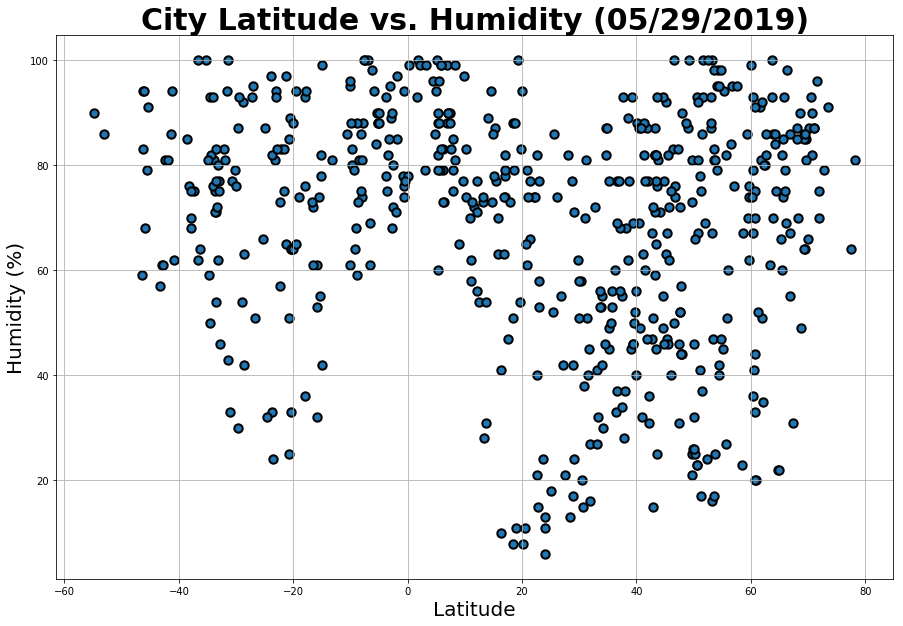

In [7]:
# Create the Latitude vs. Humidity Plot
lat_v_humid_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Humidity", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )


# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 20)
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Humidity Plot to a png file
plt.savefig("output_data/City_Lat_vs_Humid.png")

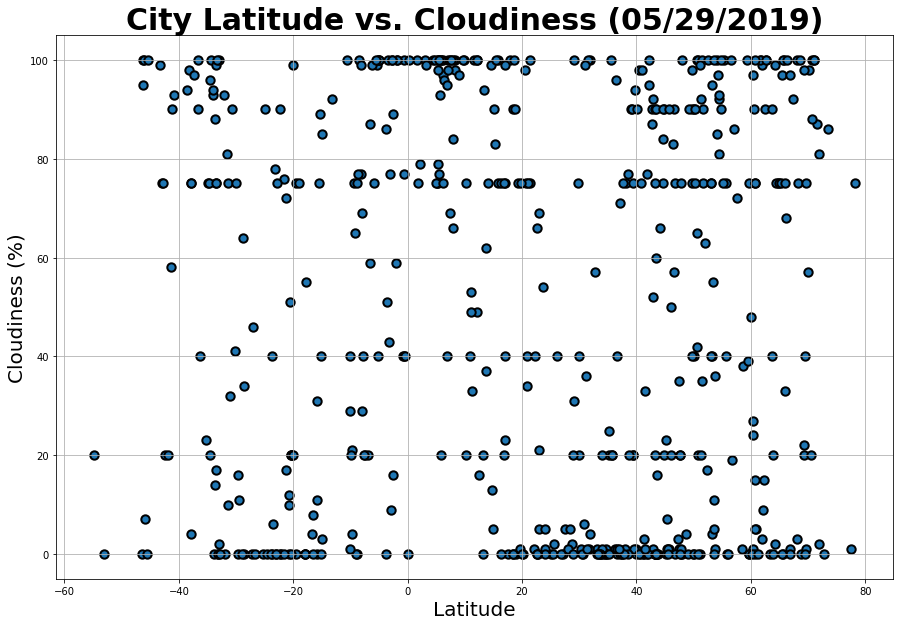

In [8]:
# Create the Latitude vs. Cloudiness Plot
lat_v_cloud_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Cloudiness", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )


# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Cloudiness Plot to a png file
plt.savefig("output_data/City_Lat_vs_Cloud.png")

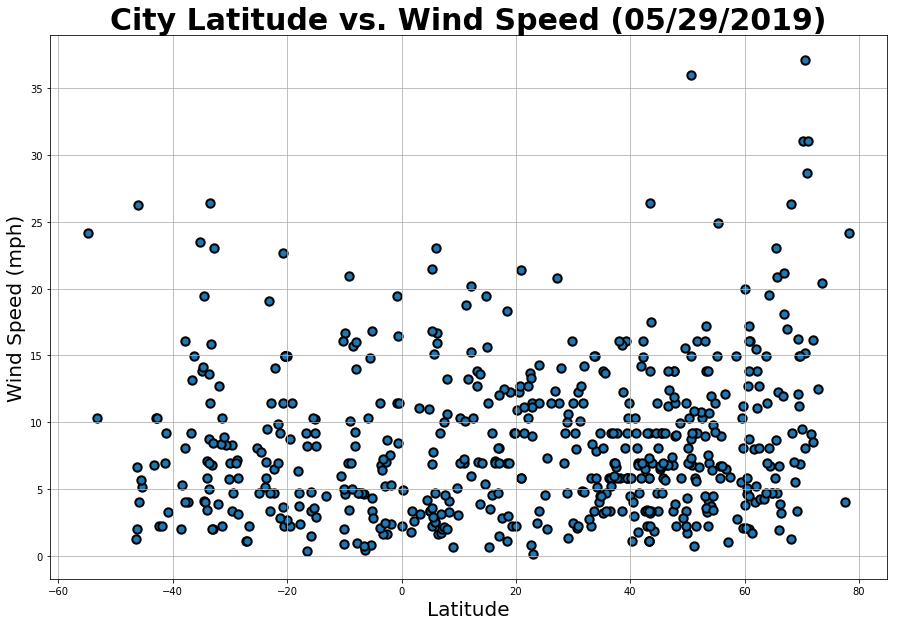

In [9]:
# Create the Latitude vs. Wind Speed Plot
lat_v_wind_chart = city_weather_df.plot(kind="scatter", 
                                        x="Latitude", 
                                        y="Wind Speed", 
                                        s=70,
                                        edgecolors="black", 
                                        linewidth=2,
                                        grid=True, 
                                        figsize=(15,10),        
                                        )

# Add formatted title and lables
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize = 30, fontweight="bold")

# Export picture the Latitude vs. Wind Speed Plot to a png file
plt.savefig("output_data/City_Lat_vs_Wind.png")